# Chapter 1 - The Problem With Missing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the airquality dataset
airquality = pd.read_csv('air-quality.csv', parse_dates=['Date'], index_col='Date')

# Create a nullity DataFrame airquality_nullity
airquality_nullity = airquality.isnull()
print(airquality_nullity.head())

# Calculate total of missing values
missing_values_sum = airquality_nullity.sum()
print('Total Missing Values:\n', missing_values_sum)

# Calculate percentage of missing values
missing_values_percent = airquality_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

            Ozone  Solar   Wind   Temp
Date                                  
1976-05-01  False  False  False  False
1976-05-02  False  False  False  False
1976-05-03  False  False  False  False
1976-05-04  False  False  False  False
1976-05-05   True   True  False  False
Total Missing Values:
 Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64
Percentage of Missing Values:
 Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64


'/usr/local/share/datasets/bar_chart.png'

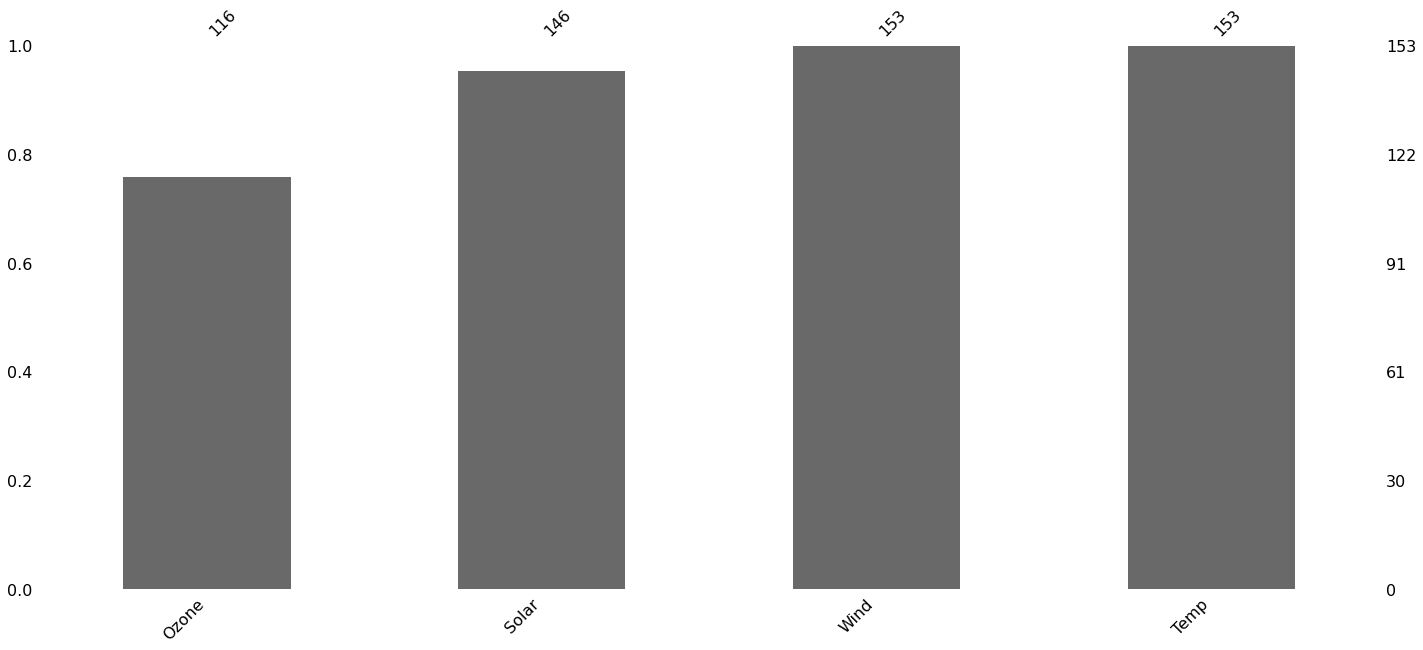

In [3]:
# Import missingno as msno
import missingno as msno

# Plot amount of missingness
msno.bar(airquality)

# Display bar chart of missing values
display("/usr/local/share/datasets/bar_chart.png")

'/usr/local/share/datasets/matrix.png'

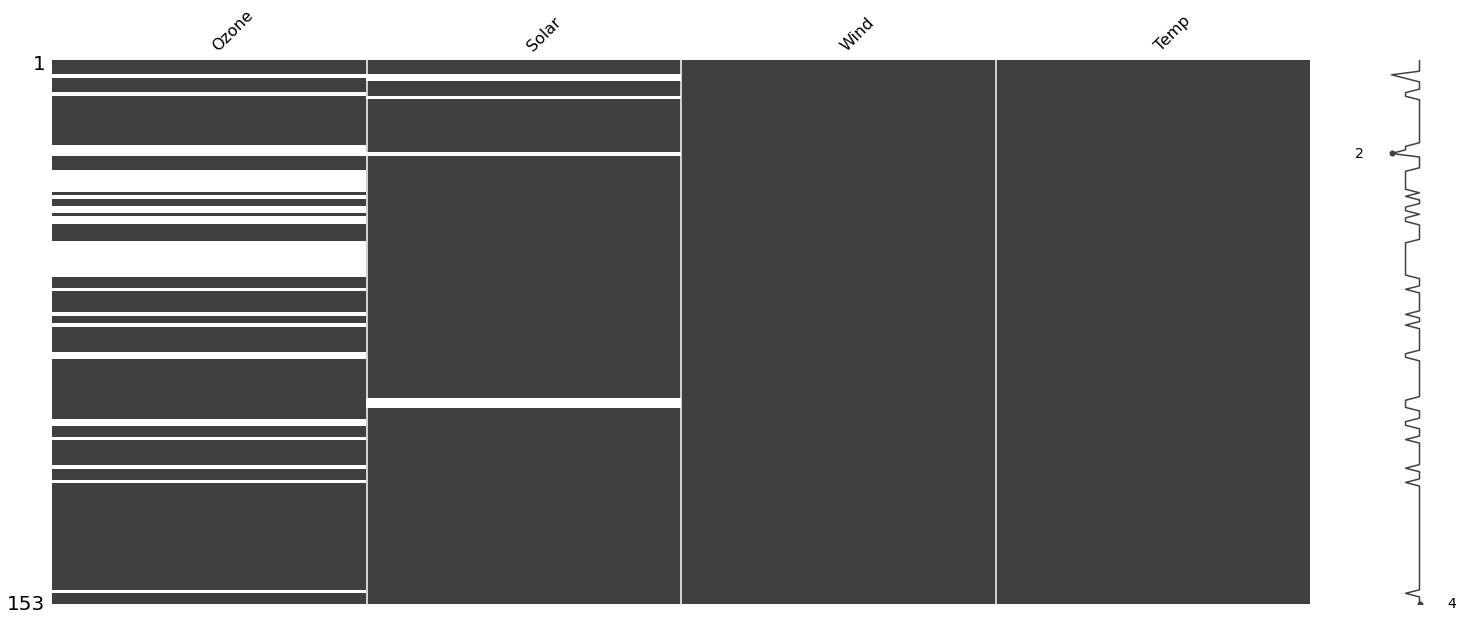

In [4]:
# Plot nullity matrix of airquality
msno.matrix(airquality)

# Display nullity matrix
display("/usr/local/share/datasets/matrix.png")

'/usr/local/share/datasets/matrix_frequency.png'

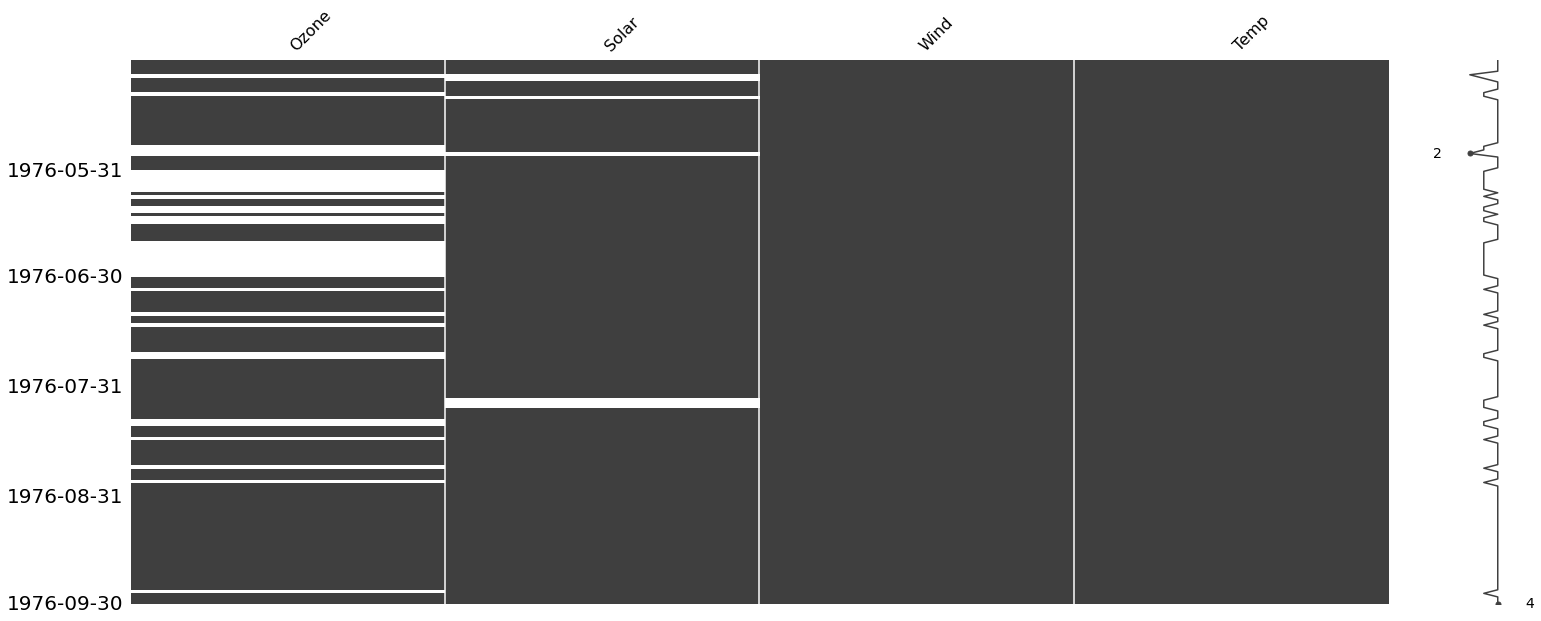

In [5]:
# Plot nullity matrix of airquality with frequency 'M'
msno.matrix(airquality, freq='M')

# Display nullity matrix
display("/usr/local/share/datasets/matrix_frequency.png")

'/usr/local/share/datasets/matrix_sliced.png'

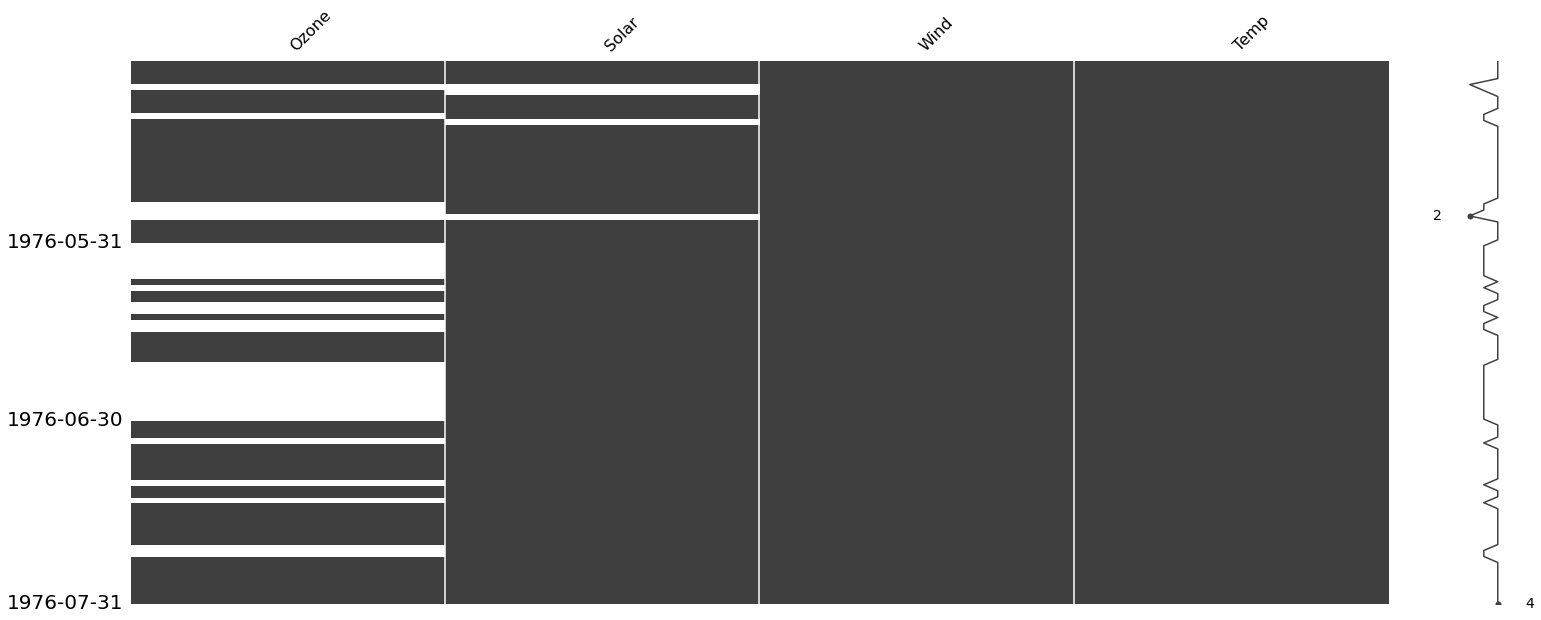

In [6]:
# Plot the sliced nullity matrix of airquality with frequency 'M'
msno.matrix(airquality.loc['May-1976':'Jul-1976'], freq='M')

# Display nullity matrix
display("/usr/local/share/datasets/matrix_sliced.png")

# Chapter 2 - Does Missingness Have A Pattern?

In [7]:
diabetes = pd.read_csv('pima-indians-diabetes data.csv')

'/usr/local/share/datasets/matrix_sorted.png'

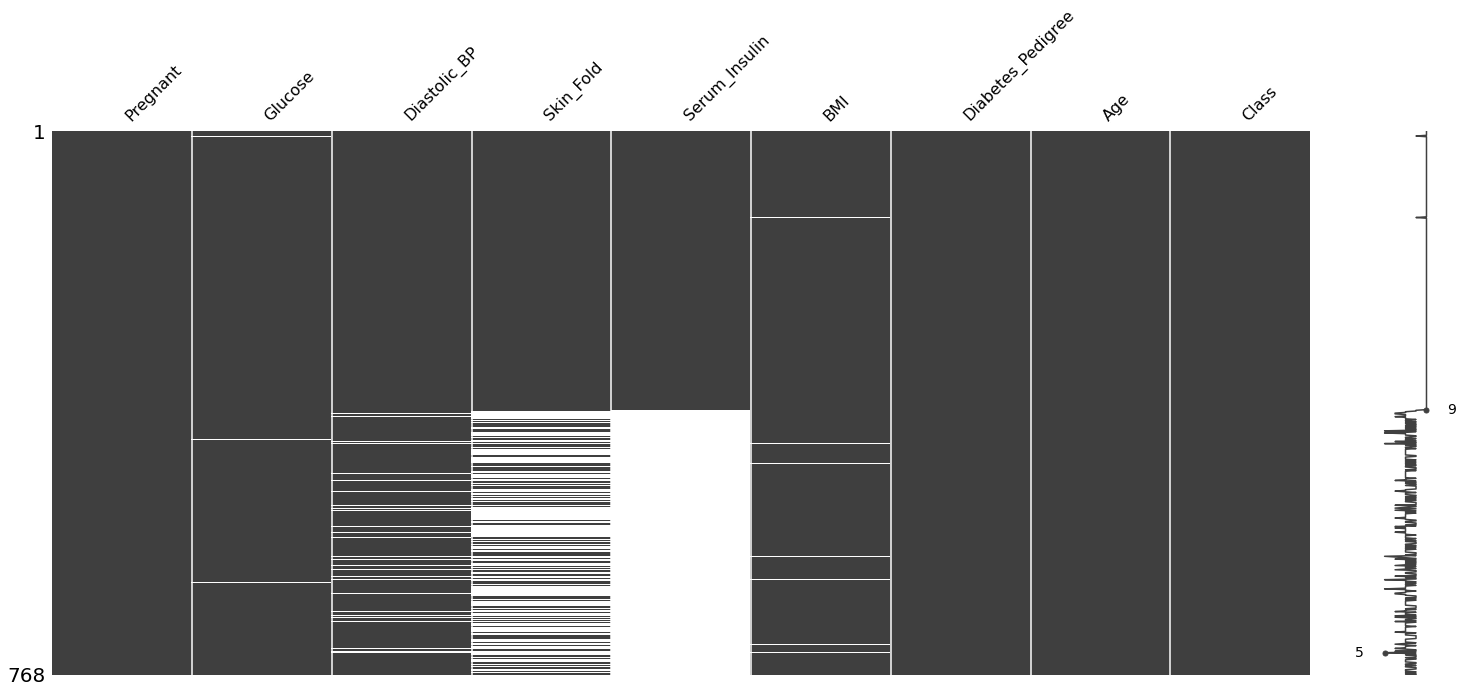

In [8]:
# Sort diabetes dataframe on 'Serum_Insulin'
sorted_values = diabetes.sort_values('Serum_Insulin')

# Visualize the missingness summary of sorted
msno.matrix(sorted_values)

# Display nullity matrix
display("/usr/local/share/datasets/matrix_sorted.png")

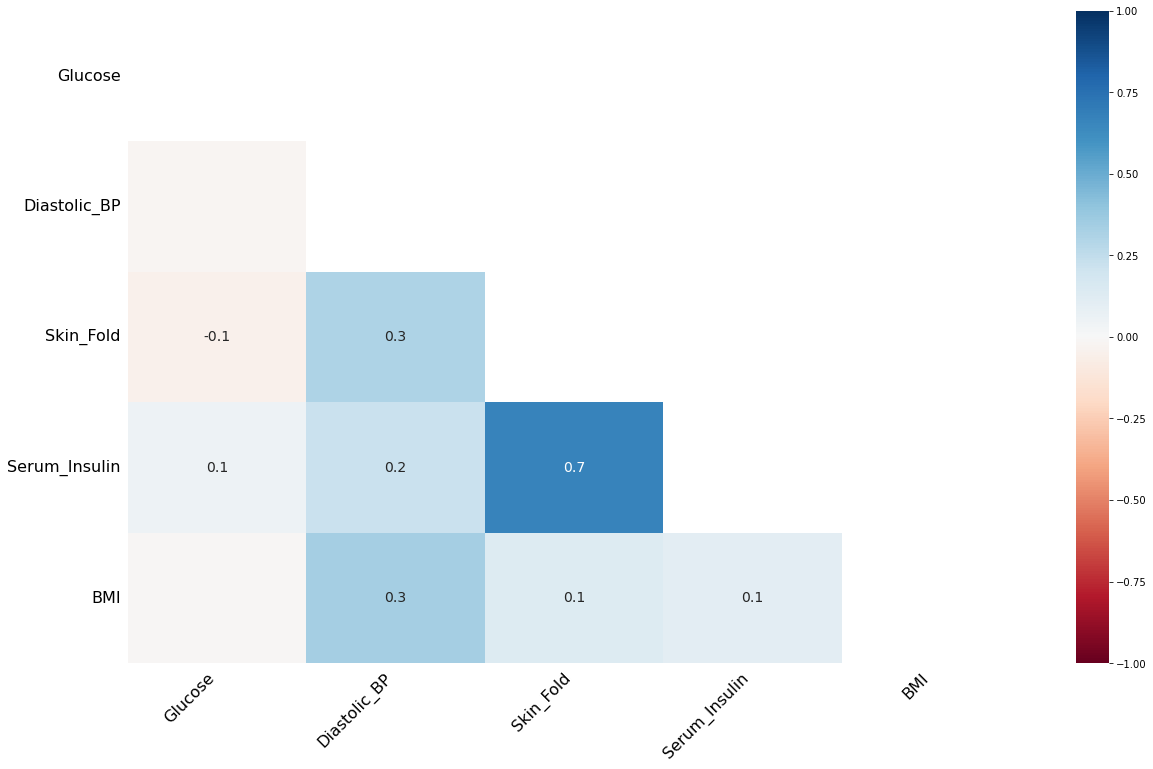

In [9]:
# Plot missingness heatmap of diabetes
msno.heatmap(diabetes)

# Show plot
plt.show()

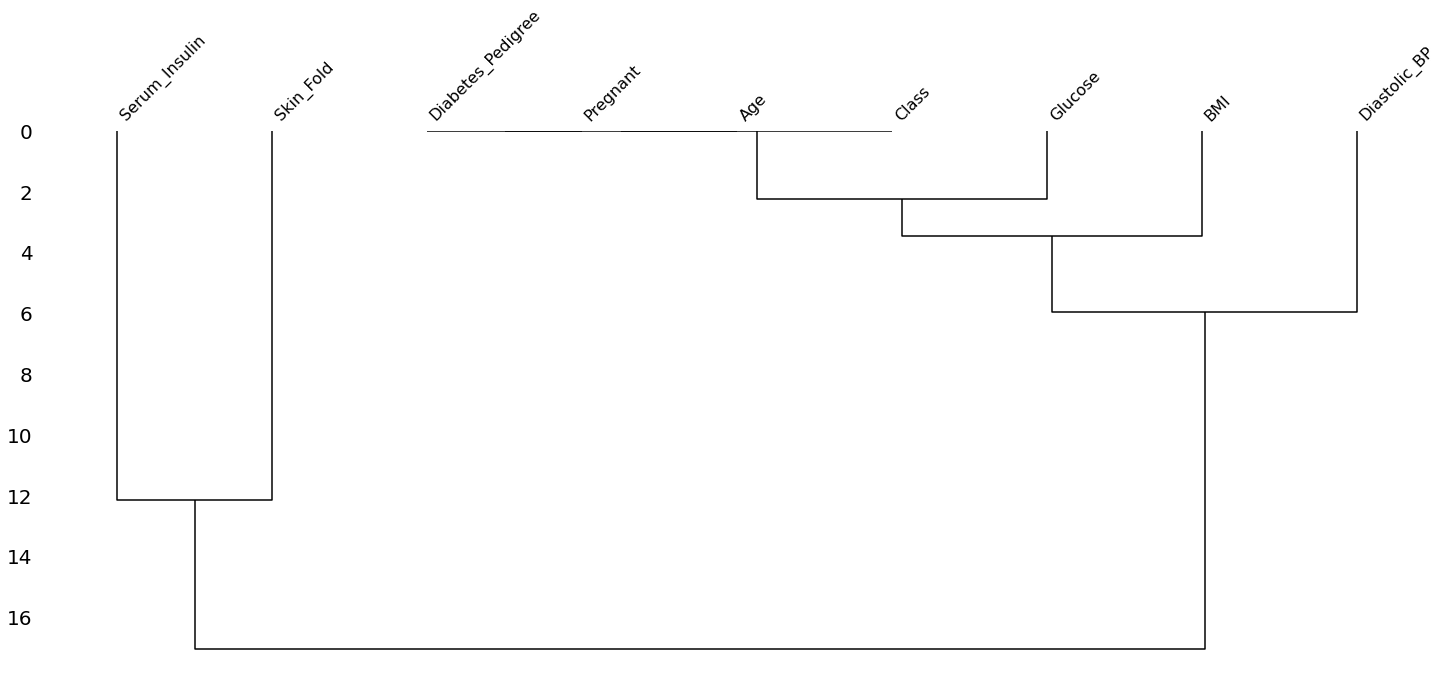

In [10]:
# Plot missingness dendrogram of diabetes
msno.dendrogram(diabetes)

# Show plot
plt.show()

In [11]:
from numpy.random import rand

def fill_dummy_values(df, scaling_factor=0.075):
  df_dummy = df.copy(deep=True)
  for col_name in df_dummy:
    col = df_dummy[col_name]
    col_null = col.isnull()    
    # Calculate number of missing values in column 
    num_nulls = col_null.sum()
    # Calculate column range
    col_range = col.max() - col.min()
    # Scale the random values to scaling_factor times col_range
    dummy_values = (rand(num_nulls) - 2) * scaling_factor * col_range + col.min()
    col[col_null] = dummy_values
  return df_dummy

C:\Users\mkars\AppData\Local\Temp\ipykernel_20984\369941047.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col_null] = dummy_values


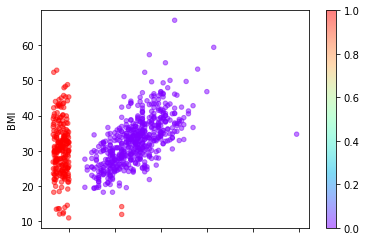

In [12]:
# Fill dummy values in diabetes_dummy
diabetes_dummy = fill_dummy_values(diabetes)

# Sum the nullity of Skin_Fold and BMI
nullity = diabetes.Skin_Fold.isnull() + diabetes.BMI.isnull()

# Create a scatter plot of Skin Fold and BMI 
diabetes_dummy.plot(x='Skin_Fold', y='BMI', kind='scatter', alpha=0.5, 
                    
                    # Set color to nullity of BMI and Skin_Fold
                    c=nullity, 
                    cmap='rainbow')

plt.show()

5


'/usr/local/share/datasets/glucose_dropped.png'

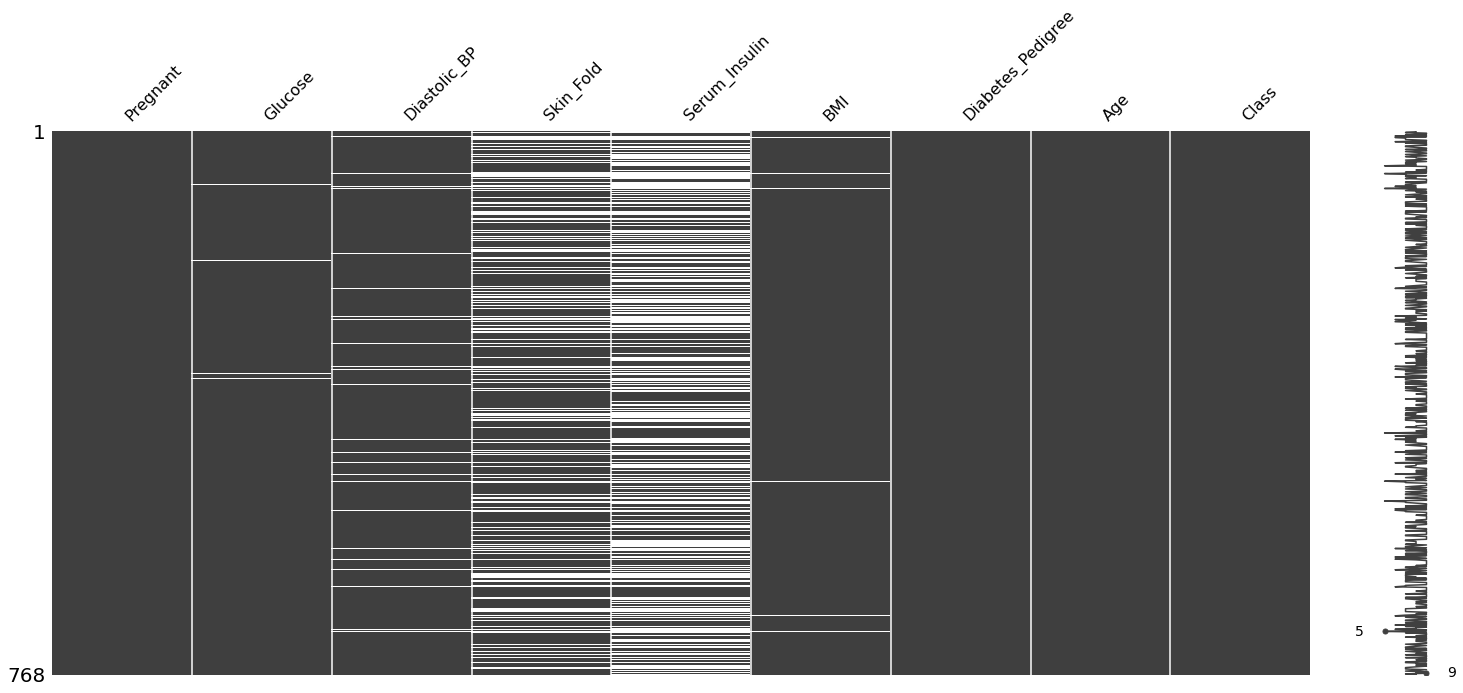

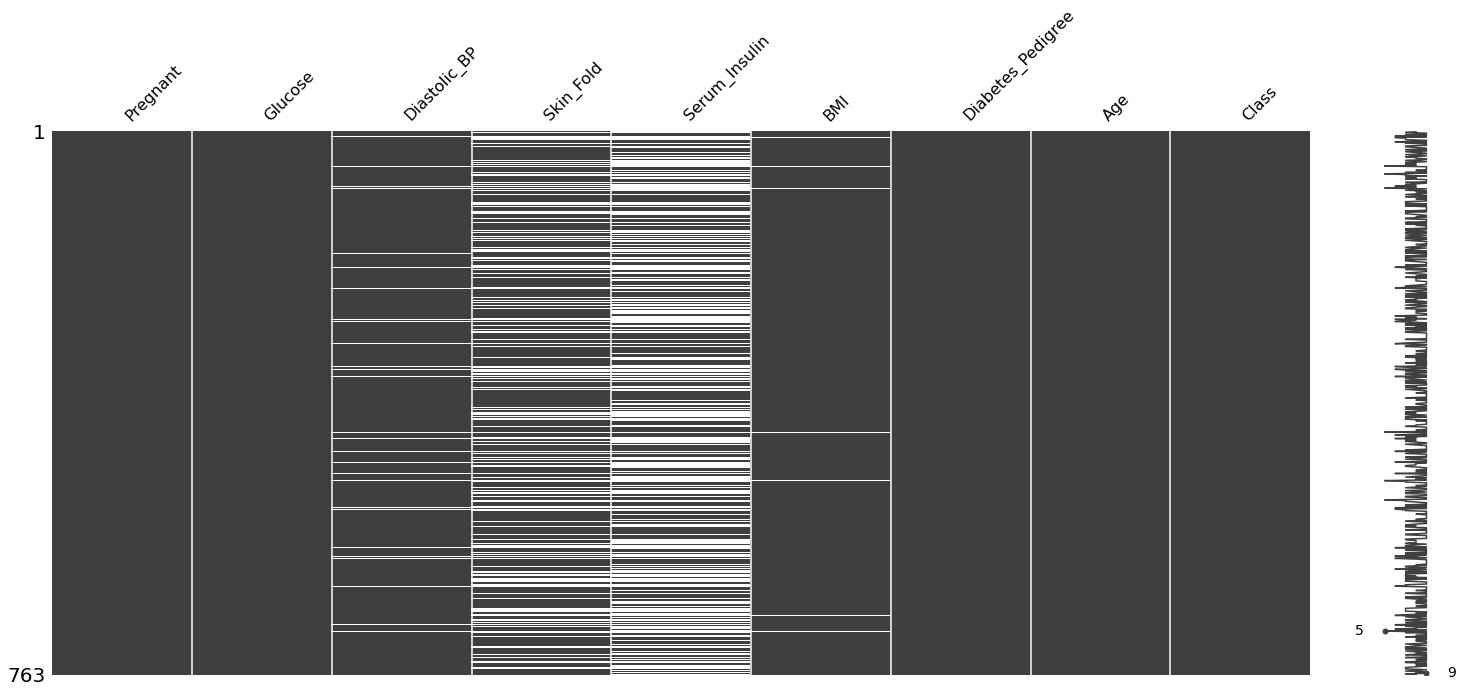

In [13]:
# Visualize the missingness of diabetes prior to dropping missing values
msno.matrix(diabetes)

# Print the number of missing values in Glucose
print(diabetes['Glucose'].isnull().sum())

# Drop rows where 'Glucose' has a missing value
diabetes.dropna(subset=['Glucose'], how='any', inplace=True)

# Visualize the missingness of diabetes after dropping missing values
msno.matrix(diabetes)

display("/usr/local/share/datasets/glucose_dropped.png")

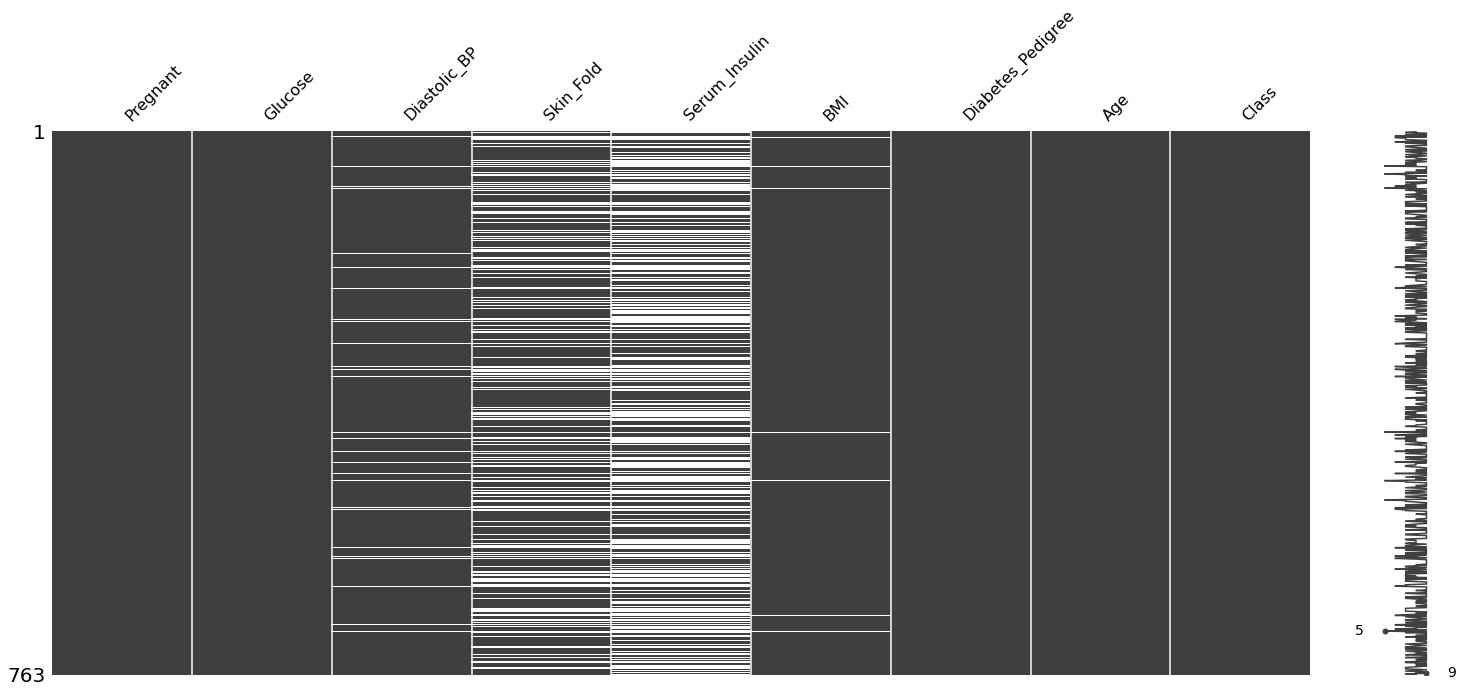

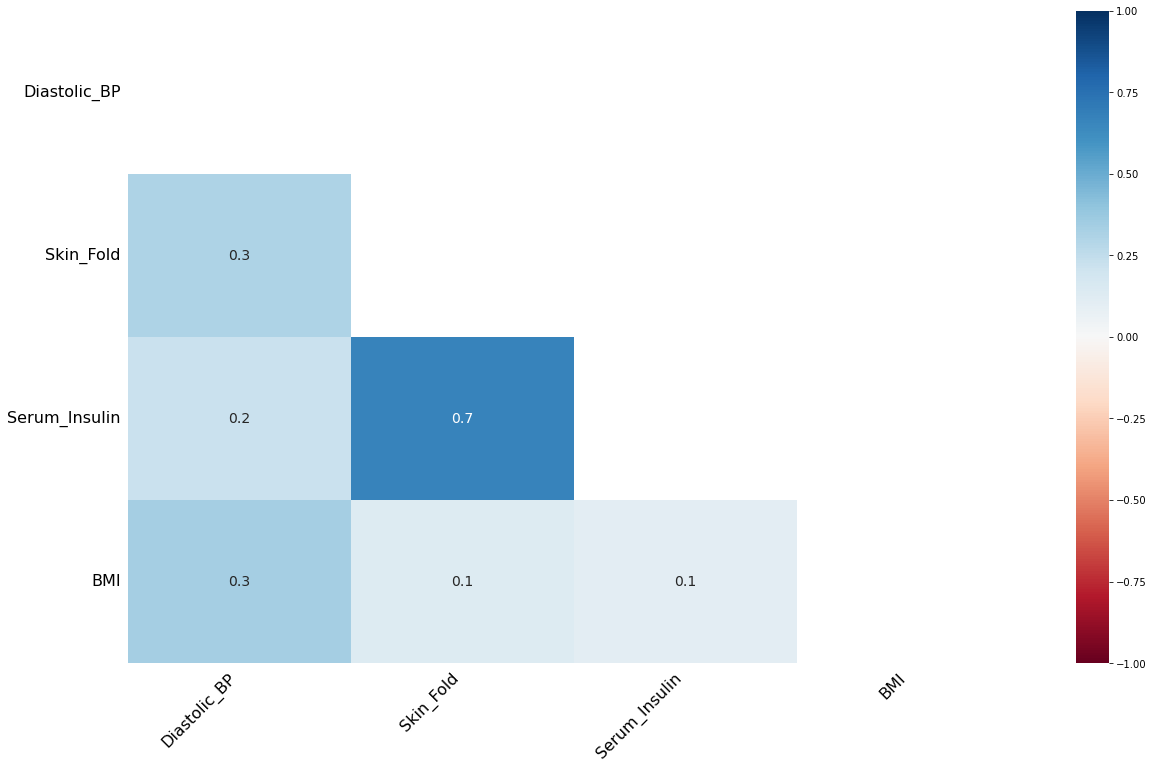

In [14]:
# Visualize the missingness in the data
msno.matrix(diabetes)

# Visualize the correlation of missingness between variables
msno.heatmap(diabetes)

# Show heatmap
plt.show()

# Drop rows where 'BMI' has a missing value
diabetes.dropna(subset=['BMI'], how='all', inplace=True)

# Chapter 3 - Imputation Techniques

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
# Make a copy of diabetes
diabetes_mean = diabetes.copy(deep=True)

# Create mean imputer object
mean_imputer = SimpleImputer(strategy='mean')

# Impute mean values in the DataFrame diabetes_mean
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

In [17]:
# Make a copy of diabetes
diabetes_median = diabetes.copy(deep=True)

# Create median imputer object
median_imputer = SimpleImputer(strategy='median')

# Impute median values in the DataFrame diabetes_median
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)

In [18]:
# Make a copy of diabetes
diabetes_mode = diabetes.copy(deep=True)

# Create mode imputer object
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute using most frequent value in the DataFrame mode_imputer
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)

In [19]:
# Make a copy of diabetes
diabetes_constant = diabetes.copy(deep=True)

# Create median imputer object
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Impute missing values to 0 in diabetes_constant
diabetes_constant.iloc[:, :] = constant_imputer.fit_transform(diabetes_constant)

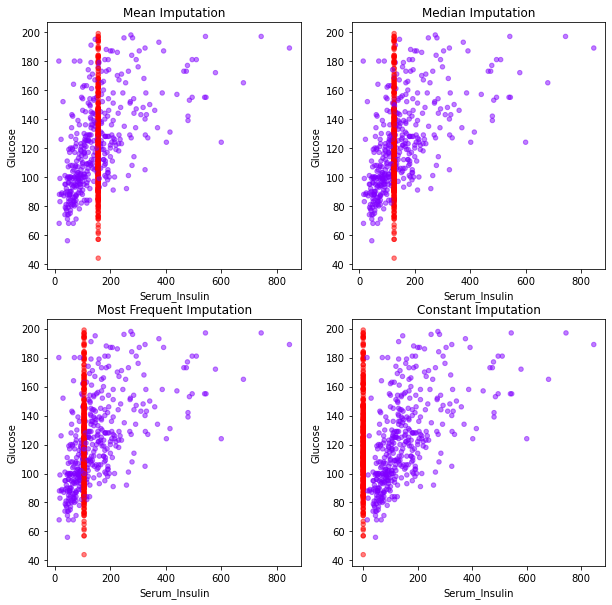

In [20]:
# Set nrows and ncols to 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = diabetes.Serum_Insulin.isnull()+diabetes.Glucose.isnull()

# Create a dictionary of imputations
imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median, 
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

# Loop over flattened axes and imputations
for ax, df_key in zip(axes.flatten(), imputations):
    # Select and also set the title for a DataFrame
    imputations[df_key].plot(x='Serum_Insulin', y='Glucose', kind='scatter', 
                          alpha=0.5, c=nullity, cmap='rainbow', ax=ax, 
                          colorbar=False, title=df_key)
plt.show()

In [21]:
airquality_bkup = airquality.copy(deep=True)

In [22]:
# Print prior to imputing missing values
print(airquality[30:40])

# Fill NaNs using forward fill
airquality.fillna(method='ffill', inplace=True)

# Print after imputing missing values
print(airquality[30:40])

            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-06-01    NaN  286.0   8.6    78
1976-06-02    NaN  287.0   9.7    74
1976-06-03    NaN  242.0  16.1    67
1976-06-04    NaN  186.0   9.2    84
1976-06-05    NaN  220.0   8.6    85
1976-06-06    NaN  264.0  14.3    79
1976-06-07   29.0  127.0   9.7    82
1976-06-08    NaN  273.0   6.9    87
1976-06-09   71.0  291.0  13.8    90
            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-06-01   37.0  286.0   8.6    78
1976-06-02   37.0  287.0   9.7    74
1976-06-03   37.0  242.0  16.1    67
1976-06-04   37.0  186.0   9.2    84
1976-06-05   37.0  220.0   8.6    85
1976-06-06   37.0  264.0  14.3    79
1976-06-07   29.0  127.0   9.7    82
1976-06-08   29.0  273.0   6.9    87
1976-06-09   71.0  291.0  13.8    90


In [23]:
airquality = airquality_bkup.copy(deep=True)

In [24]:
# Print prior to imputing missing values
print(airquality[30:40])

# Fill NaNs using backward fill
airquality.fillna(method='bfill', inplace=True)

# Print after imputing missing values
print(airquality[30:40])

            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-06-01    NaN  286.0   8.6    78
1976-06-02    NaN  287.0   9.7    74
1976-06-03    NaN  242.0  16.1    67
1976-06-04    NaN  186.0   9.2    84
1976-06-05    NaN  220.0   8.6    85
1976-06-06    NaN  264.0  14.3    79
1976-06-07   29.0  127.0   9.7    82
1976-06-08    NaN  273.0   6.9    87
1976-06-09   71.0  291.0  13.8    90
            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-06-01   29.0  286.0   8.6    78
1976-06-02   29.0  287.0   9.7    74
1976-06-03   29.0  242.0  16.1    67
1976-06-04   29.0  186.0   9.2    84
1976-06-05   29.0  220.0   8.6    85
1976-06-06   29.0  264.0  14.3    79
1976-06-07   29.0  127.0   9.7    82
1976-06-08   71.0  273.0   6.9    87
1976-06-09   71.0  291.0  13.8    90


In [25]:
airquality = airquality_bkup.copy(deep=True)

In [26]:
# Print prior to interpolation
print(airquality[30:40])

# Interpolate the NaNs linearly
airquality.interpolate(method='linear', inplace=True)

# Print after interpolation
print(airquality[30:40])

            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-06-01    NaN  286.0   8.6    78
1976-06-02    NaN  287.0   9.7    74
1976-06-03    NaN  242.0  16.1    67
1976-06-04    NaN  186.0   9.2    84
1976-06-05    NaN  220.0   8.6    85
1976-06-06    NaN  264.0  14.3    79
1976-06-07   29.0  127.0   9.7    82
1976-06-08    NaN  273.0   6.9    87
1976-06-09   71.0  291.0  13.8    90
                Ozone  Solar  Wind  Temp
Date                                    
1976-05-31  37.000000  279.0   7.4    76
1976-06-01  35.857143  286.0   8.6    78
1976-06-02  34.714286  287.0   9.7    74
1976-06-03  33.571429  242.0  16.1    67
1976-06-04  32.428571  186.0   9.2    84
1976-06-05  31.285714  220.0   8.6    85
1976-06-06  30.142857  264.0  14.3    79
1976-06-07  29.000000  127.0   9.7    82
1976-06-08  50.000000  273.0   6.9    87
1976-06-09  71.000000  291.0  13.8    90


In [27]:
airquality = airquality_bkup.copy(deep=True)

In [28]:
# Print prior to interpolation
print(airquality[30:40])

# Interpolate the NaNs quadratically
airquality.interpolate(method='quadratic', inplace=True)

# Print after interpolation
print(airquality[30:40])

            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-06-01    NaN  286.0   8.6    78
1976-06-02    NaN  287.0   9.7    74
1976-06-03    NaN  242.0  16.1    67
1976-06-04    NaN  186.0   9.2    84
1976-06-05    NaN  220.0   8.6    85
1976-06-06    NaN  264.0  14.3    79
1976-06-07   29.0  127.0   9.7    82
1976-06-08    NaN  273.0   6.9    87
1976-06-09   71.0  291.0  13.8    90
                Ozone  Solar  Wind  Temp
Date                                    
1976-05-31  37.000000  279.0   7.4    76
1976-06-01 -38.361123  286.0   8.6    78
1976-06-02 -79.352735  287.0   9.7    74
1976-06-03 -85.974836  242.0  16.1    67
1976-06-04 -62.354606  186.0   9.2    84
1976-06-05 -33.255133  220.0   8.6    85
1976-06-06  -2.803598  264.0  14.3    79
1976-06-07  29.000000  127.0   9.7    82
1976-06-08  62.155660  273.0   6.9    87
1976-06-09  71.000000  291.0  13.8    90


In [29]:
airquality = airquality_bkup.copy(deep=True)

In [30]:
# Print prior to interpolation
print(airquality[30:40])

# Interpolate the NaNs with nearest value
airquality.interpolate(method='nearest', inplace=True)

# Print after interpolation
print(airquality[30:40])

            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-06-01    NaN  286.0   8.6    78
1976-06-02    NaN  287.0   9.7    74
1976-06-03    NaN  242.0  16.1    67
1976-06-04    NaN  186.0   9.2    84
1976-06-05    NaN  220.0   8.6    85
1976-06-06    NaN  264.0  14.3    79
1976-06-07   29.0  127.0   9.7    82
1976-06-08    NaN  273.0   6.9    87
1976-06-09   71.0  291.0  13.8    90
            Ozone  Solar  Wind  Temp
Date                                
1976-05-31   37.0  279.0   7.4    76
1976-06-01   37.0  286.0   8.6    78
1976-06-02   37.0  287.0   9.7    74
1976-06-03   37.0  242.0  16.1    67
1976-06-04   29.0  186.0   9.2    84
1976-06-05   29.0  220.0   8.6    85
1976-06-06   29.0  264.0  14.3    79
1976-06-07   29.0  127.0   9.7    82
1976-06-08   29.0  273.0   6.9    87
1976-06-09   71.0  291.0  13.8    90


In [31]:
airquality = airquality_bkup.copy(deep=True)

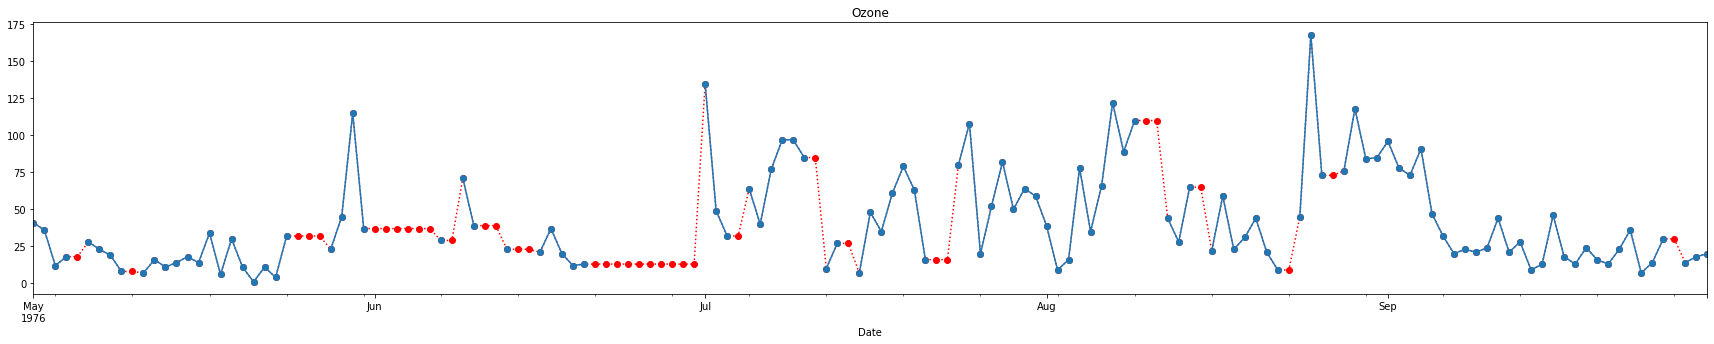

In [32]:
# Impute airquality DataFrame with ffill method
ffill_imputed = airquality.fillna(method='ffill')

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

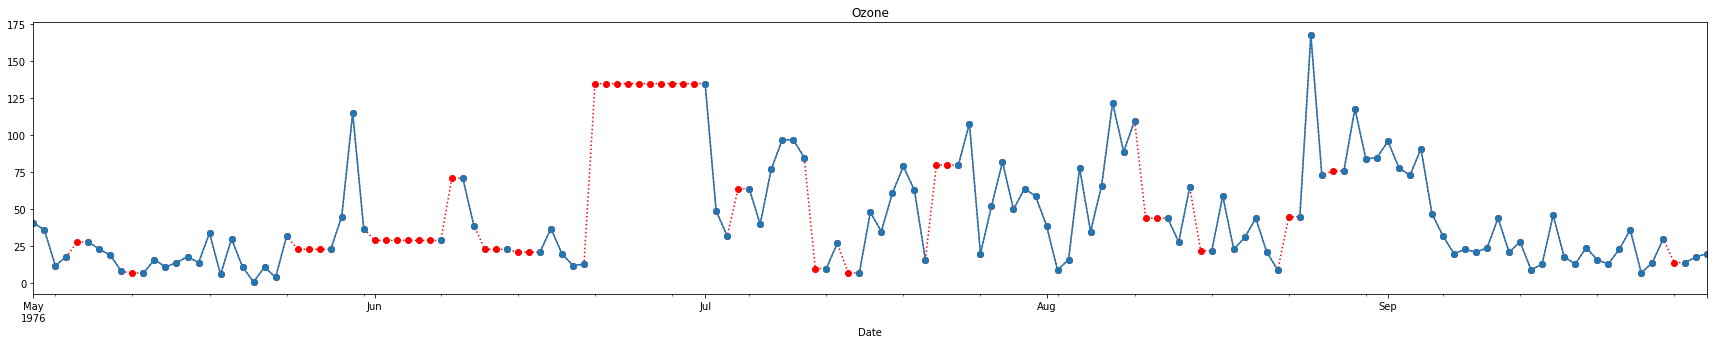

In [33]:
# Impute airquality DataFrame with bfill method
bfill_imputed = airquality.fillna(method='bfill')

# Plot the imputed DataFrame bfill_imp in red dotted style 
bfill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

In [36]:
linear = airquality.interpolate(method='linear')
quadratic = airquality.interpolate(method='quadratic')
nearest = airquality.interpolate(method='nearest')

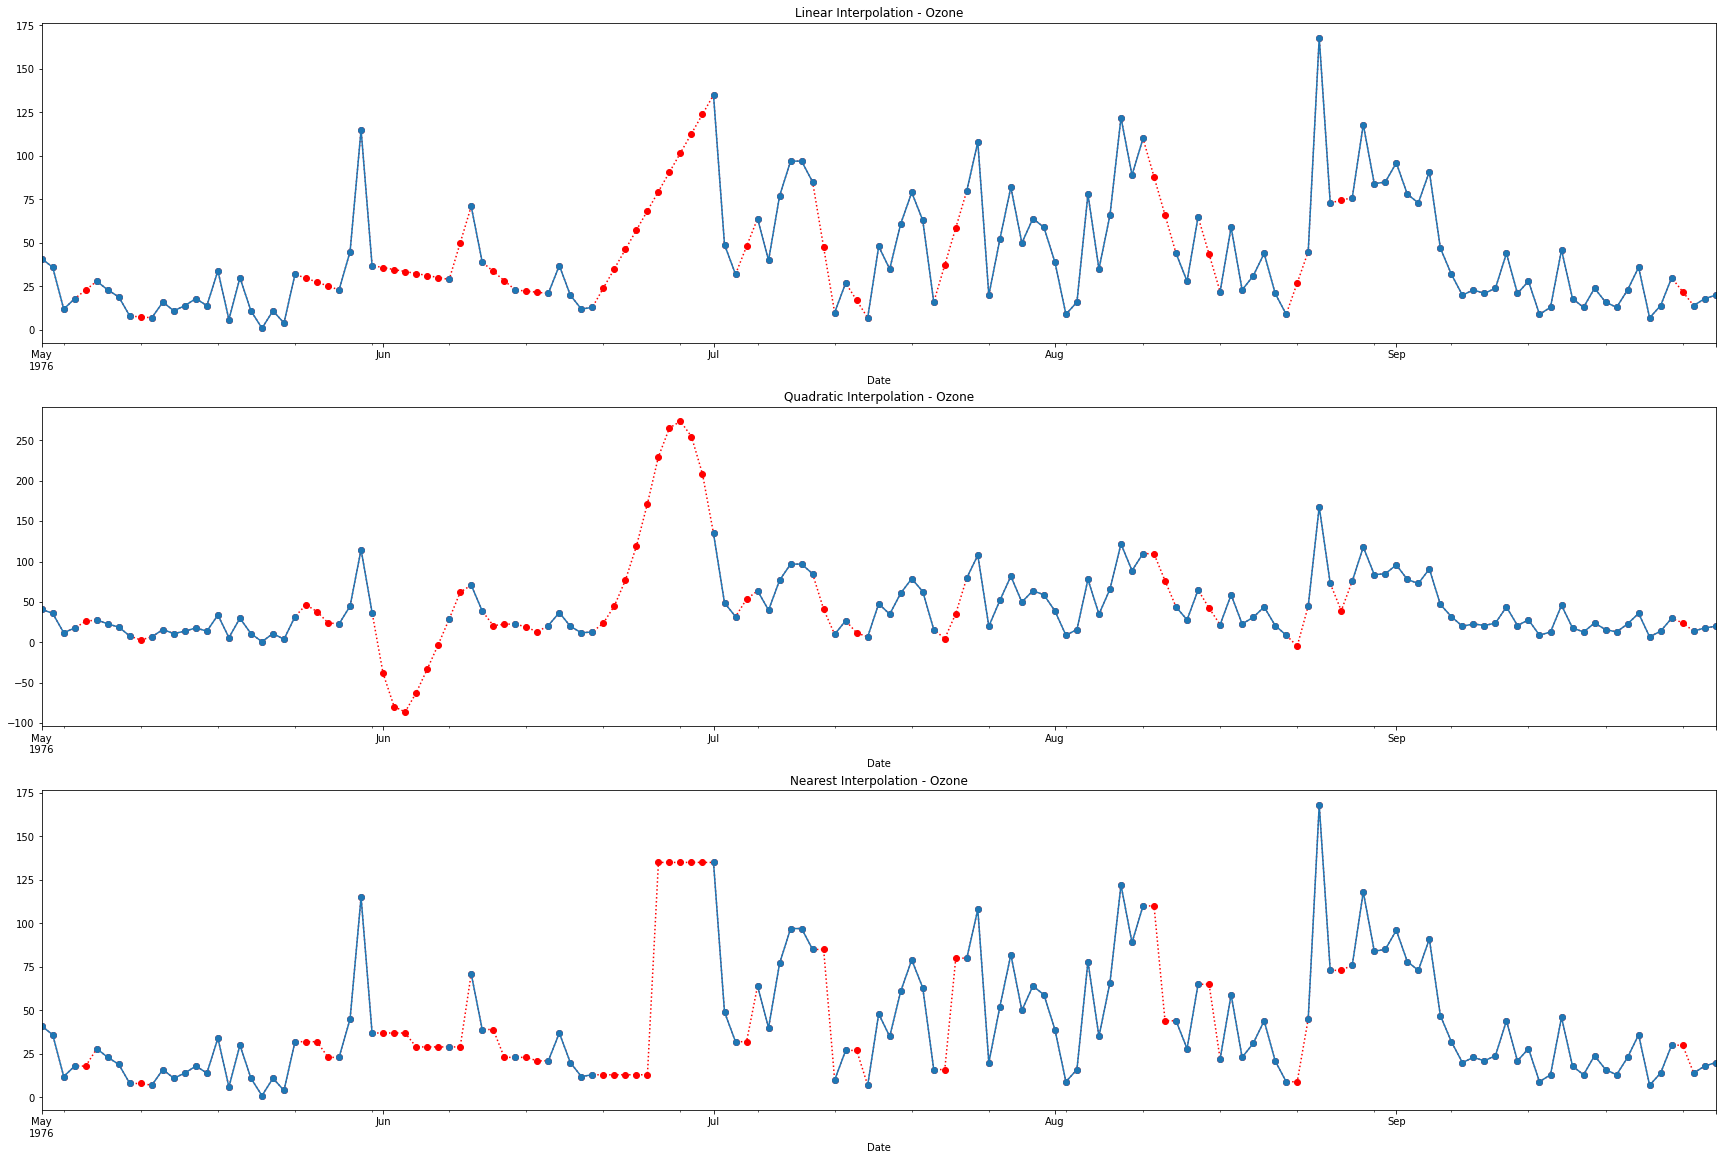

In [37]:
# Set nrows to 3 and ncols to 1
fig, axes = plt.subplots(3, 1, figsize=(30, 20))

# Create a dictionary of interpolations
interpolations = {'Linear Interpolation': linear, 'Quadratic Interpolation': quadratic, 
                  'Nearest Interpolation': nearest}

# Loop over axes and interpolations
for ax, df_key in zip(axes, interpolations):
  # Select and also set the title for a DataFrame
  interpolations[df_key].Ozone.plot(color='red', marker='o', 
                                 linestyle='dotted', ax=ax)
  airquality.Ozone.plot(title=df_key + ' - Ozone', marker='o', ax=ax)
  
plt.show()

# Chapter 4 - Advanced Imputation Techniques

In [39]:
# Import KNN from fancyimpute
from fancyimpute import KNN

# Copy diabetes to diabetes_knn_imputed
diabetes_knn_imputed = diabetes.copy(deep=True)

# Initialize KNN
knn_imputer = KNN()

# Impute using fit_tranform on diabetes_knn_imputed
diabetes_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn_imputed)

Imputing row 1/752 with 1 missing, elapsed time: 0.053
Imputing row 101/752 with 0 missing, elapsed time: 0.055
Imputing row 201/752 with 2 missing, elapsed time: 0.056
Imputing row 301/752 with 0 missing, elapsed time: 0.057
Imputing row 401/752 with 1 missing, elapsed time: 0.058
Imputing row 501/752 with 2 missing, elapsed time: 0.059
Imputing row 601/752 with 0 missing, elapsed time: 0.059
Imputing row 701/752 with 0 missing, elapsed time: 0.061


In [40]:
# Import IterativeImputer from fancyimpute
from fancyimpute import IterativeImputer

# Copy diabetes to diabetes_mice_imputed
diabetes_mice_imputed = diabetes.copy(deep=True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Impute using fit_tranform on diabetes
diabetes_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(diabetes_mice_imputed)

In [43]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
users = pd.read_csv('userprofile.csv')
users.head()

,Unnamed: 0,smoker,drink_level,dress_preference,ambience,hijos,activity,budget
0,0,False,abstemious,informal,family,independent,student,medium
1,1,False,abstemious,informal,family,independent,student,low
2,2,False,social drinker,formal,family,independent,student,low
3,3,False,abstemious,informal,family,independent,professional,medium
4,4,False,abstemious,no preference,family,independent,student,medium


In [47]:
# Create Ordinal encoder
ambience_ord_enc = OrdinalEncoder()

# Select non-null values of ambience column in users
ambience = users['ambience']
ambience_not_null = ambience[ambience.notnull()]

# Reshape ambience_not_null to shape (-1, 1)
reshaped_vals = ambience_not_null.values.reshape(-1, 1)

# Ordinally encode reshaped_vals
encoded_vals = ambience_ord_enc.fit_transform(reshaped_vals)

# Assign back encoded values to non-null values of ambience in users
users.loc[ambience.notnull(), 'ambience'] = np.squeeze(encoded_vals)

In [48]:
# Create an empty dictionary ordinal_enc_dict
ordinal_enc_dict = {}

for col_name in users:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = users[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    users.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [49]:
# Create KNN imputer
KNN_imputer = KNN()

# Impute and round the users DataFrame
users.iloc[:, :] = np.round(KNN_imputer.fit_transform(users))

# Loop over the column names in users
for col_name in users:
    
    # Reshape the data
    reshaped = users[col_name].values.reshape(-1, 1)
    
    # Perform inverse transform of the ordinally encoded columns
    users[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

Imputing row 1/138 with 0 missing, elapsed time: 0.003
Imputing row 101/138 with 0 missing, elapsed time: 0.004


In [52]:
import statsmodels.api as sm

C:\Users\mkars\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\mkars\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [58]:
diabetes_cc = diabetes.dropna(how='any')

In [60]:
# Add constant to X and set X & y values to fit linear model
X = sm.add_constant(diabetes_cc.iloc[:, :-1])
y = diabetes_cc['Class']
lm = sm.OLS(y, X).fit()

# Print summary of lm
print('\nSummary: ', lm.summary())

# Print R squared score of lm
print('\nAdjusted R-squared score: ', lm.rsquared_adj)

# Print the params of lm
print('\nCoefficcients:\n', lm.params)


Summary:                              OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     25.30
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           2.65e-31
Time:                        20:36:29   Log-Likelihood:                -177.76
No. Observations:                 392   AIC:                             373.5
Df Residuals:                     383   BIC:                             409.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.102

C:\Users\mkars\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [65]:
diabetes_mean_imputed = diabetes.copy(deep=True)
mean_imputer = SimpleImputer(strategy='mean')
diabetes_mean_imputed.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

In [66]:
# Mean Imputation
X = sm.add_constant(diabetes_mean_imputed.iloc[:, :-1])
y = diabetes['Class']
lm_mean = sm.OLS(y, X).fit()
# KNN Imputation
X = sm.add_constant(diabetes_knn_imputed.iloc[:, :-1])
lm_KNN = sm.OLS(y, X).fit()
# MICE Imputation
X = sm.add_constant(diabetes_mice_imputed.iloc[:, :-1])
lm_MICE = sm.OLS(y, X).fit()

C:\Users\mkars\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\mkars\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\mkars\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [67]:
# Store the Adj. R-squared scores of the linear models
r_squared = pd.DataFrame({'Complete Case': lm.rsquared_adj, 
                          'Mean Imputation': lm_mean.rsquared_adj, 
                          'KNN Imputation': lm_KNN.rsquared_adj, 
                          'MICE Imputation': lm_MICE.rsquared_adj}, 
                         index=['Adj. R-squared'])

print(r_squared)

                Complete Case  Mean Imputation  KNN Imputation  \
Adj. R-squared       0.332108         0.312339        0.313224   

                MICE Imputation  
Adj. R-squared          0.31249  


In [68]:
# Store the coefficients of the linear models
coeff = pd.DataFrame({'Complete Case': lm.params, 
                      'Mean Imputation': lm_mean.params, 
                      'KNN Imputation': lm_KNN.params, 
                      'MICE Imputation': lm_MICE.params})

print(coeff)

                   Complete Case  Mean Imputation  KNN Imputation  \
const                  -1.102677        -1.012616       -1.021117   
Pregnant                0.012953         0.019565        0.019141   
Glucose                 0.006409         0.006501        0.006640   
Diastolic_BP            0.000055        -0.001212       -0.001372   
Skin_Fold               0.001678         0.000100        0.001426   
Serum_Insulin          -0.000123        -0.000100       -0.000144   
BMI                     0.009325         0.014151        0.013240   
Diabetes_Pedigree       0.157192         0.137044        0.137003   
Age                     0.005878         0.002161        0.002236   

                   MICE Imputation  
const                    -1.025887  
Pregnant                  0.019390  
Glucose                   0.006643  
Diastolic_BP             -0.001268  
Skin_Fold                 0.000607  
Serum_Insulin            -0.000122  
BMI                       0.013806  
Diabetes_Pedi

In [69]:
r_squares = {'Mean Imputation': lm_mean.rsquared_adj, 
             'KNN Imputation': lm_KNN.rsquared_adj, 
             'MICE Imputation': lm_MICE.rsquared_adj}

# Select best R-squared
best_imputation = max(r_squares, key=r_squares.get)

print("The best imputation technique is: ", best_imputation)

The best imputation technique is:  KNN Imputation


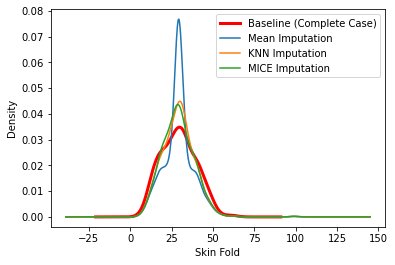

In [70]:
# Plot graphs of imputed DataFrames and the complete case
diabetes_cc['Skin_Fold'].plot(kind='kde', c='red', linewidth=3)
diabetes_mean_imputed['Skin_Fold'].plot(kind='kde')
diabetes_knn_imputed['Skin_Fold'].plot(kind='kde')
diabetes_mice_imputed['Skin_Fold'].plot(kind='kde')

# Create labels for the four DataFrames
labels = ['Baseline (Complete Case)', 'Mean Imputation', 'KNN Imputation', 'MICE Imputation']
plt.legend(labels)

# Set the x-label as Skin Fold
plt.xlabel('Skin Fold')

plt.show()